In [1]:
# Import the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df1=pd.read_csv('Electric_Vehicle_Data.csv')

In [3]:
df1.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [4]:
print(df1.shape)

(103, 14)


In [5]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB
None


In [6]:
print(df1.describe)

<bound method NDFrame.describe of            Brand                            Model     Accel  TopSpeed   Range  \
0         Tesla     Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450 km   
1    Volkswagen                         ID.3 Pure  10.0 sec  160 km/h  270 km   
2      Polestar                                 2   4.7 sec  210 km/h  400 km   
3           BMW                              iX3    6.8 sec  180 km/h  360 km   
4         Honda                                e    9.5 sec  145 km/h  170 km   
..           ...                              ...       ...       ...     ...   
98       Nissan                       Ariya 63kWh   7.5 sec  160 km/h  330 km   
99         Audi     e-tron S Sportback 55 quattro   4.5 sec  210 km/h  335 km   
100      Nissan               Ariya e-4ORCE 63kWh   5.9 sec  200 km/h  325 km   
101      Nissan   Ariya e-4ORCE 87kWh Performance   5.1 sec  200 km/h  375 km   
102       Byton                 M-Byte 95 kWh 2WD   7.5 sec  190 km/h  400 

**Exploratory Data Analysis**

<ipython-input-7-bdf10d65788d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df1, x='Brand', kind='count',palette='magma' , height=6, aspect=2)


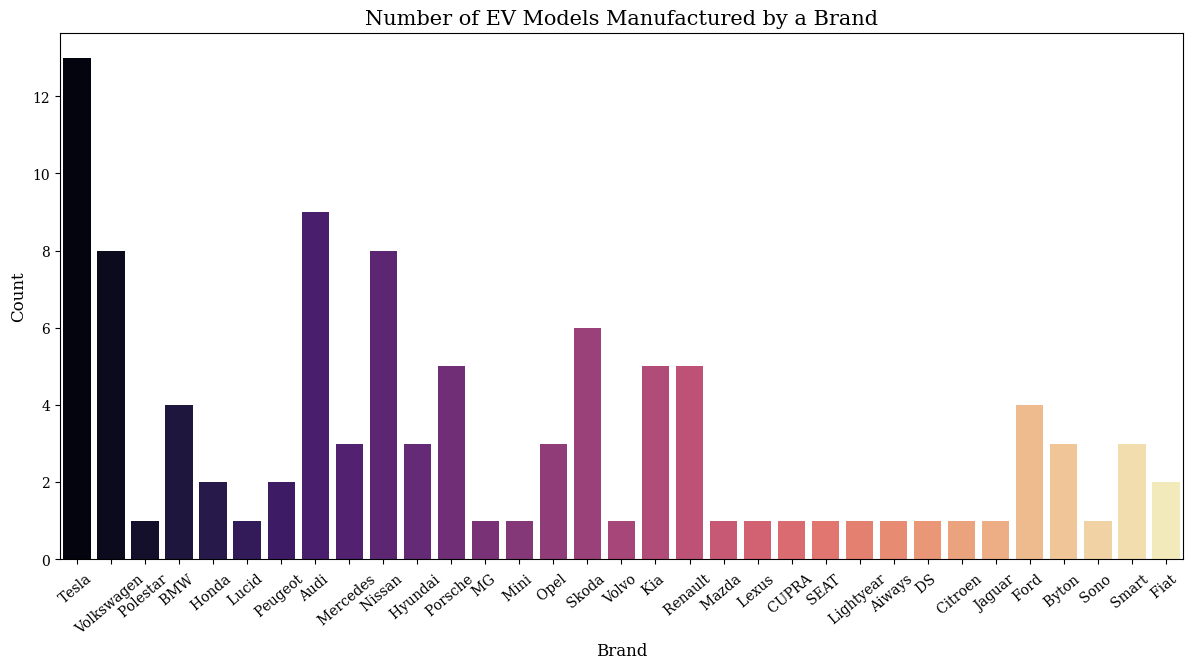

In [7]:
# brand-wise count of EV models
sns.catplot(data=df1, x='Brand', kind='count',palette='magma' , height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

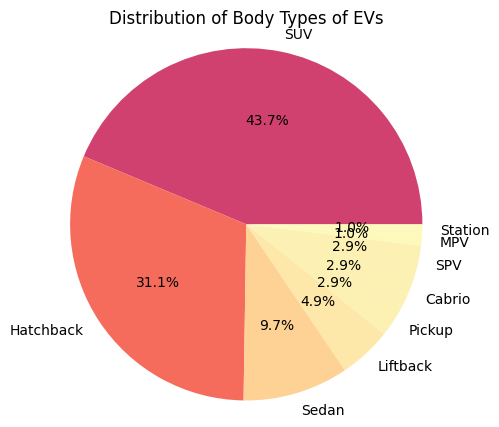

In [8]:
# Distribution of Body Types of EVs
from matplotlib import cm
dataset = df1['BodyStyle'].value_counts()

# Calculate the percentage of each body style
total_count = len(df1)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.magma_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Body Types of EVs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


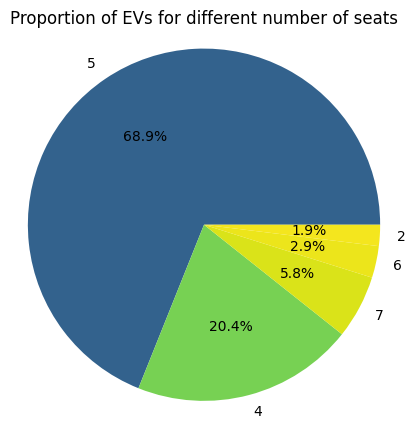

In [9]:
# Proportion of EVs for different number of seats
dataset = df1['Seats'].value_counts()

# Calculate the percentage of each body style
total_count = len(df1)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Proportion of EVs for different number of seats')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

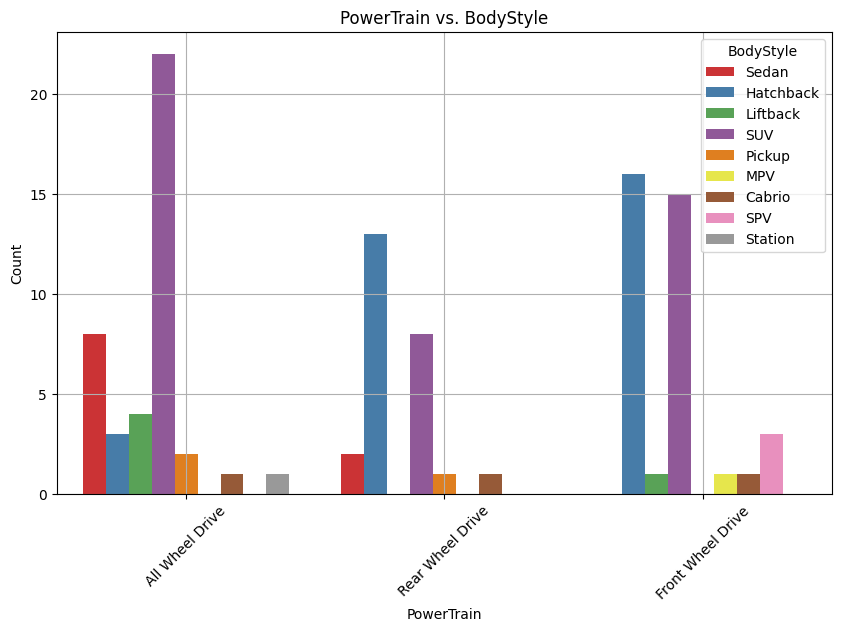

In [10]:
# Categorical plot: Powertrain vs. Bodystyle
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("Set1")
sns.countplot(data=df1, x='PowerTrain', hue='BodyStyle', palette=custom_palette)
plt.title('PowerTrain vs. BodyStyle')
plt.xlabel('PowerTrain')
plt.ylabel('Count')
plt.legend(title='BodyStyle', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-11-36ec5f3e5d30>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='Segment', palette='viridis')


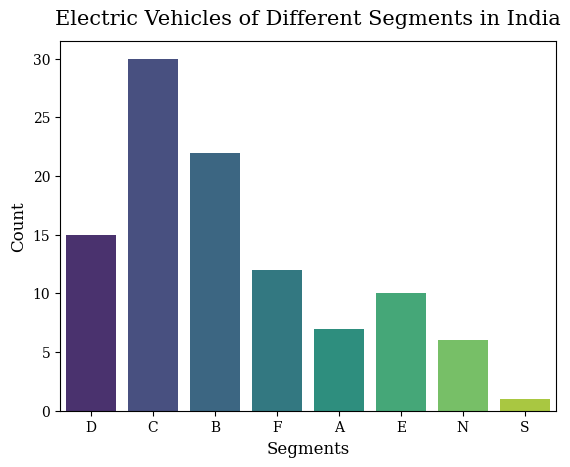

In [11]:
# EVs of different number of seats from the dataset
sns.countplot(data=df1, x='Segment', palette='viridis')
plt.xlabel('Segments', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Electric Vehicles of Different Segments in India', family='serif', size=15, pad=12)
plt.show()

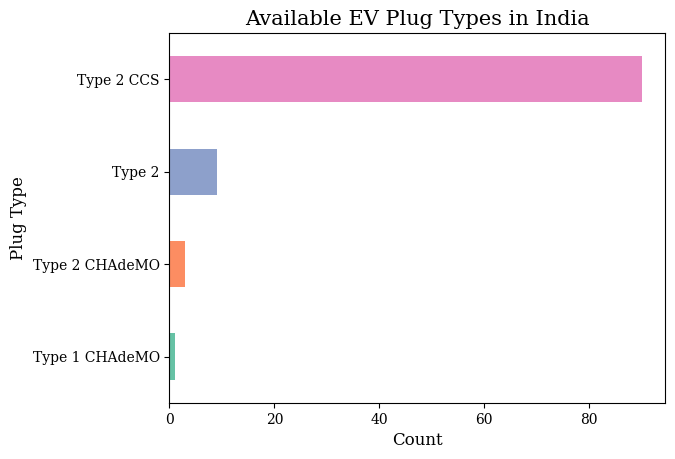

In [12]:
# Visualization of different plug types
custom_palette = sns.color_palette("Set2")
df1['PlugType'].value_counts().sort_values(ascending=True).plot.barh(color=custom_palette)
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available EV Plug Types in India', family='serif', size=15)
plt.show()

<ipython-input-13-c79dc492eb9d>:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(data=df1, x='Segment', hue='PlugType', palette=custom_palette)


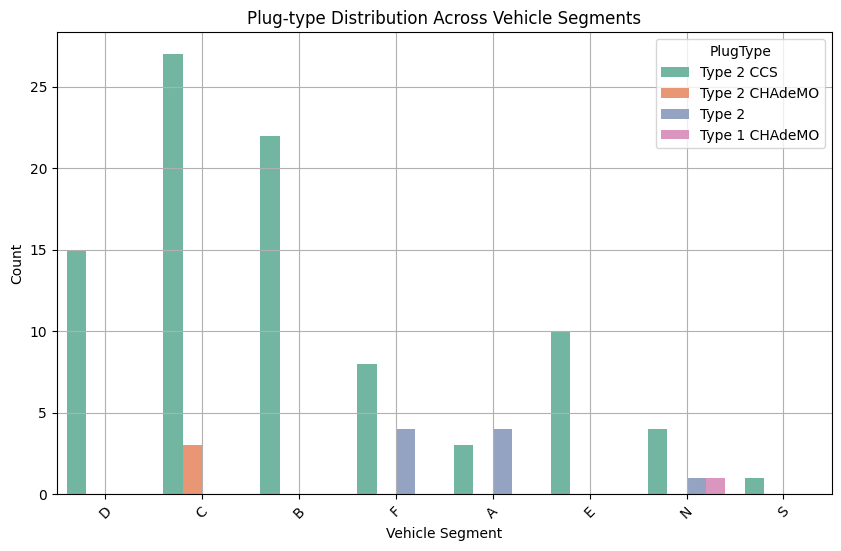

In [13]:
# Usage of plug type in every segment
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("Set2")

sns.countplot(data=df1, x='Segment', hue='PlugType', palette=custom_palette)
plt.title('Plug-type Distribution Across Vehicle Segments')
plt.xlabel('Vehicle Segment')
plt.ylabel('Count')
plt.legend(title='PlugType', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

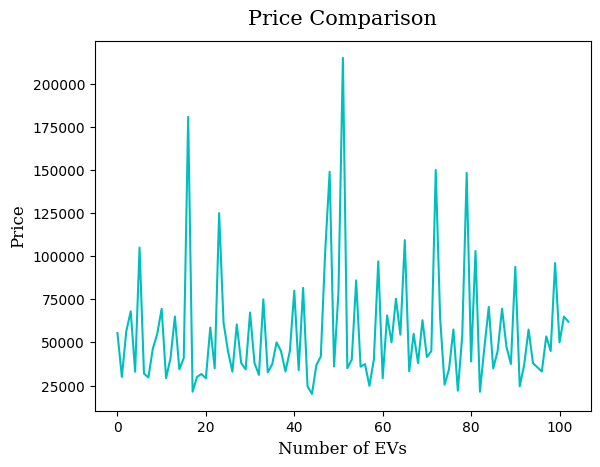

In [14]:
# Price range of EVs
plt.plot(df1['PriceEuro'], color='c')
plt.xlabel('Number of EVs', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);

Text(0.5, 1.0, 'Price Distribution')

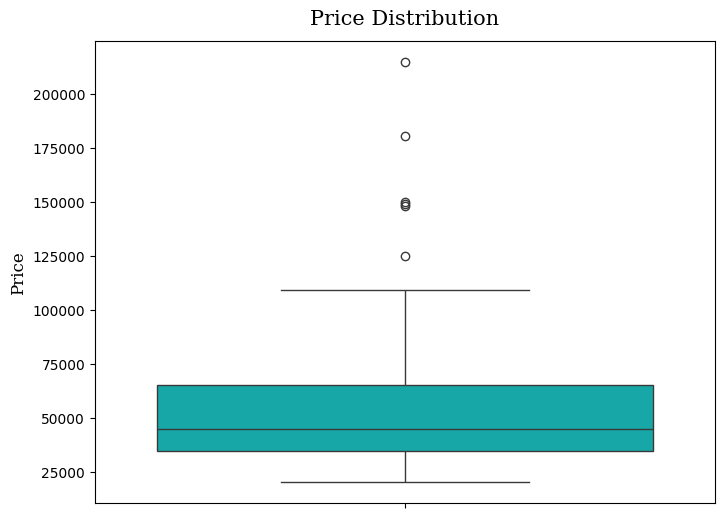

In [15]:
# Average price range of EVs
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, y='PriceEuro', color='c')
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Distribution', family='serif', size=15, pad=12)

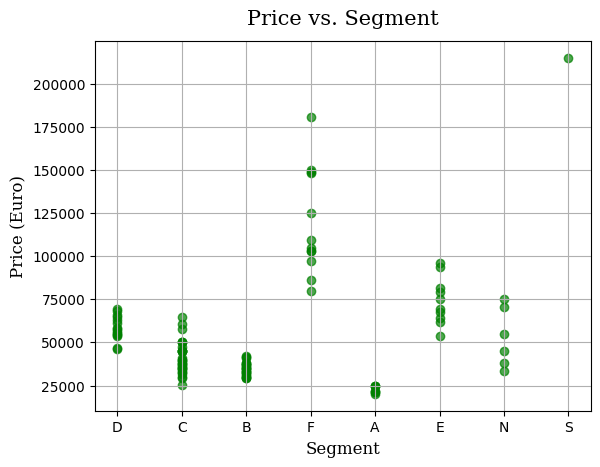

In [16]:
# Average price for different EV segments
plt.scatter(df1['Segment'], df1['PriceEuro'], color='g', alpha=0.7)
plt.xlabel('Segment', family='serif', size=12)
plt.ylabel('Price (Euro)', family='serif', size=12)
plt.title('Price vs. Segment', family='serif', size=15, pad=12)
plt.grid(True)

In [17]:
# Conversion of object data type to float datatype for further analysis
df1['TopSpeed'] = df1['TopSpeed'].astype(str)
df1['TopSpeed'] = df1['TopSpeed'].str.replace(' km/h', '').astype(float)

#df1['TopSpeed'] = df1['TopSpeed'].str.split(' ').str[0].astype(float)
df1['Efficiency'] = df1['Efficiency'].astype(str)
df1['Efficiency'] = df1['Efficiency'].str.split(' ').str[0].astype(float)

df1['FastCharge'] = df1['FastCharge'].replace('-', '0')
df1['FastCharge'] = df1['FastCharge'].astype(str)
df1['FastCharge'] = df1['FastCharge'].str.replace(' km/h', '').astype(float)
#df1['FastCharge'] = df1['FastCharge'].str.replace('-', '').astype(float)

df1['Accel'] = df1['Accel'].astype(str)
df1['Accel'] = df1['Accel'].str.replace(' sec', '').astype(float)

df1['Range'] = df1['Range'].astype(str)
df1['Range'] = df1['Range'].str.split(' ').str[0].astype(float)
df1

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161.0,940.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210.0,400.0,181.0,620.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180.0,360.0,206.0,560.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145.0,170.0,168.0,190.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160.0,330.0,191.0,440.0,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210.0,335.0,258.0,540.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200.0,325.0,194.0,440.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200.0,375.0,232.0,450.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


**Market Segmentation**

In [18]:
# encode the categorical features
df1['PowerTrain'].replace(to_replace=['Rear Wheel Drive','Front Wheel Drive','All Wheel Drive'],value=[0, 1, 2],inplace=True)
df1['RapidCharge'].replace(to_replace=['Rapid charging possible','Rapid charging not possible'],value=[0, 1],inplace=True)

In [19]:
# selecting features for building a model
x=df1[['Accel','TopSpeed','Efficiency','FastCharge', 'Range', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [20]:
# feature scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
df1.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161.0,940.0,0,2,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,0,0,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210.0,400.0,181.0,620.0,0,2,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180.0,360.0,206.0,560.0,0,0,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145.0,170.0,168.0,190.0,0,0,Type 2 CCS,Hatchback,B,4,32997


In [21]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
x_pca = pca.fit_transform(x_scaled)
df2_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df2_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.327343,0.251058,-1.285910,-0.589550,0.741695,-1.336093,0.333731,-0.793532,-0.359102
1,-1.917169,-0.570523,-0.703815,0.599540,0.204536,0.345406,-0.399780,0.248018,-0.324925
2,1.528789,0.025753,-0.380455,-0.682523,0.108181,-0.727058,0.280288,0.031797,-0.086851
3,0.259288,-0.100156,-0.252992,1.609250,-0.149788,0.178422,-0.433796,-0.289689,0.186040
4,-2.566457,0.257976,-0.791391,0.322834,-0.899487,0.341113,-0.502423,0.126064,-0.165389


In [22]:
# Get explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Print explained variance ratios for each PC
for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    print(f"PC{i+1}: Explained Variance Ratio = {explained_variance_ratio:.4f}")

# Find the PC with the highest explained variance ratio
max_explained_variance_pc = explained_variance_ratios.argmax() + 1  # Add 1 to get the PC number
print(f"The PC with the highest explained variance is PC{max_explained_variance_pc}")

PC1: Explained Variance Ratio = 0.5375
PC2: Explained Variance Ratio = 0.1424
PC3: Explained Variance Ratio = 0.1072
PC4: Explained Variance Ratio = 0.0625
PC5: Explained Variance Ratio = 0.0584
PC6: Explained Variance Ratio = 0.0341
PC7: Explained Variance Ratio = 0.0257
PC8: Explained Variance Ratio = 0.0216
PC9: Explained Variance Ratio = 0.0106
The PC with the highest explained variance is PC1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

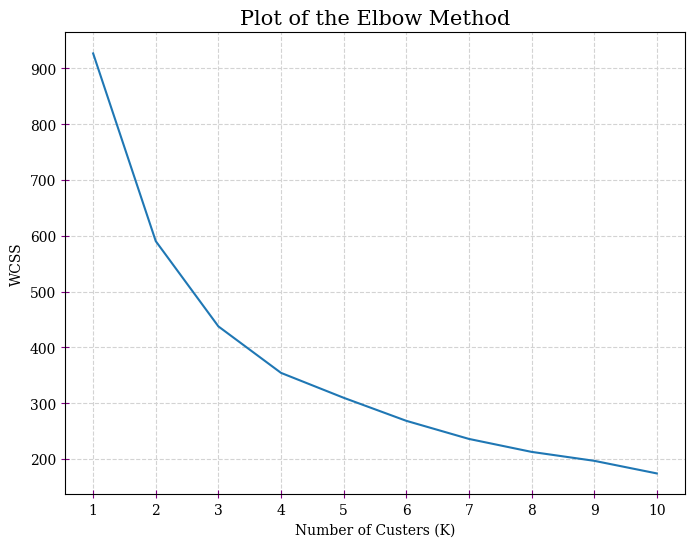

In [23]:
# plotting the results of Elbow
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(x_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [24]:
# training the model using k=4 as rendered by the above plot
kmean=KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [25]:
pd.Series(kmean.labels_).value_counts() # to check the size of clusters

0    55
1    30
3    13
2     5
Name: count, dtype: int64

In [26]:
df1['clusters'] = kmean.labels_

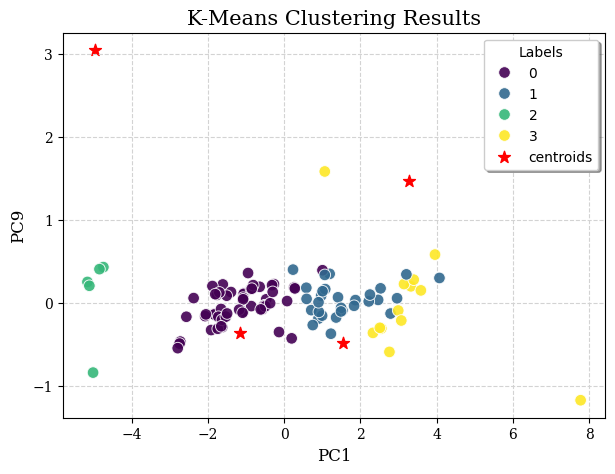

In [27]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df2_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

In [28]:
# Cluster summary for type of EVs and their properties
cluster_summary = df1.groupby('clusters').agg({
    'Accel': 'mean',
    'TopSpeed': 'mean',
    'Range': 'mean',
    'Efficiency': 'mean',
    'Seats': 'mean',
    'PriceEuro': 'mean'
})
print(cluster_summary)

              Accel    TopSpeed       Range  Efficiency     Seats  \
clusters                                                            
0          8.603636  156.163636  292.909091  174.563636  4.818182   
1          5.573333  196.266667  392.666667  219.066667  5.433333   
2         14.240000  131.000000  116.000000  175.400000  3.400000   
3          3.861538  255.769231  494.230769  187.230769  4.461538   

              PriceEuro  
clusters                 
0          37540.800000  
1          65793.533333  
2          26154.400000  
3         121482.230769  


In [29]:
# Profiles for each cluster and EVs belonging to that cluster
cluster_profiles = {}

# Iterate through each cluster label
for cluster_label in df1['clusters'].unique():
    # Filter the data for the current cluster
    cluster_data = df1[df1['clusters'] == cluster_label]

    # Create a profile for the cluster
    profile = {
        'clusters': cluster_label,
        'Number of EVs': len(cluster_data),
        'Brands': cluster_data['Brand'].unique().tolist(),
        'Models': cluster_data['Model'].unique().tolist(),
        'PowerTrain Types': cluster_data['PowerTrain'].unique().tolist(),
        'Plug Types': cluster_data['PlugType'].unique().tolist(),
        'Body Styles': cluster_data['BodyStyle'].unique().tolist(),
        'Seats Range': f"{cluster_data['Seats'].min()}-{cluster_data['Seats'].max()}",
        'Price Range (Euro)': f"{cluster_data['PriceEuro'].min()}-{cluster_data['PriceEuro'].max()}",
        # Add more relevant information here based on your dataset
    }

    # Store the cluster profile in the dictionary
    cluster_profiles[cluster_label] = profile

# Display the cluster profiles
for cluster_label, profile in cluster_profiles.items():
    print(f"Cluster {cluster_label} Profile:")
    for key, value in profile.items():
        print(f"{key}: {value}")
    print("\n")

Cluster 3 Profile:
clusters: 3
Number of EVs: 13
Brands: ['Tesla ', 'Lucid ', 'Porsche ', 'Audi ', 'Lightyear ']
Models: ['Model 3 Long Range Dual Motor', 'Air ', 'Taycan Turbo S', 'e-tron GT ', 'Model 3 Long Range Performance', 'Model S Long Range', 'Taycan 4S', 'One ', 'Roadster ', 'Model S Performance', 'Taycan 4S Plus', 'Taycan Cross Turismo ', 'Taycan Turbo']
PowerTrain Types: [2]
Plug Types: ['Type 2 CCS', 'Type 2']
Body Styles: ['Sedan', 'Liftback', 'Cabrio', 'Station']
Seats Range: 4-5
Price Range (Euro): 55480-215000


Cluster 0 Profile:
clusters: 0
Number of EVs: 55
Brands: ['Volkswagen ', 'BMW ', 'Honda ', 'Peugeot ', 'Tesla ', 'Nissan ', 'Hyundai ', 'MG ', 'Mini ', 'Opel ', 'Skoda ', 'Kia ', 'Renault ', 'Mazda ', 'Lexus ', 'CUPRA ', 'SEAT ', 'Aiways ', 'DS ', 'Citroen ', 'Ford ', 'Sono ', 'Fiat ', 'Byton ']
Models: ['ID.3 Pure', 'iX3 ', 'e ', 'e-Golf ', 'e-208 ', 'Model 3 Standard Range Plus', 'Leaf ', 'Kona Electric 64 kWh', 'i4 ', 'IONIQ Electric', 'ID.3 Pro S', 'e-Up! ',

**Exploratory Data Analysis of 'EV Stats-1.csv' (dataset 2)**

In [30]:
df2=pd.read_csv('EV Stats-1.csv')

In [31]:
df2.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431.0,692.0,4689.0,0,0.0,3680.0,0.0,9492.0
1,2,Assam,463.0,138.0,1006.0,0,117.0,151.0,0.0,1875.0
2,3,Bihar,252.0,430.0,2148.0,6,64.0,271.0,0.0,3171.0
3,4,Chhattisgarh,613.0,382.0,2078.0,58,106.0,997.0,0.0,4234.0
4,5,Delhi,1395.0,251.0,5018.0,0,1.0,12695.0,21.0,19381.0


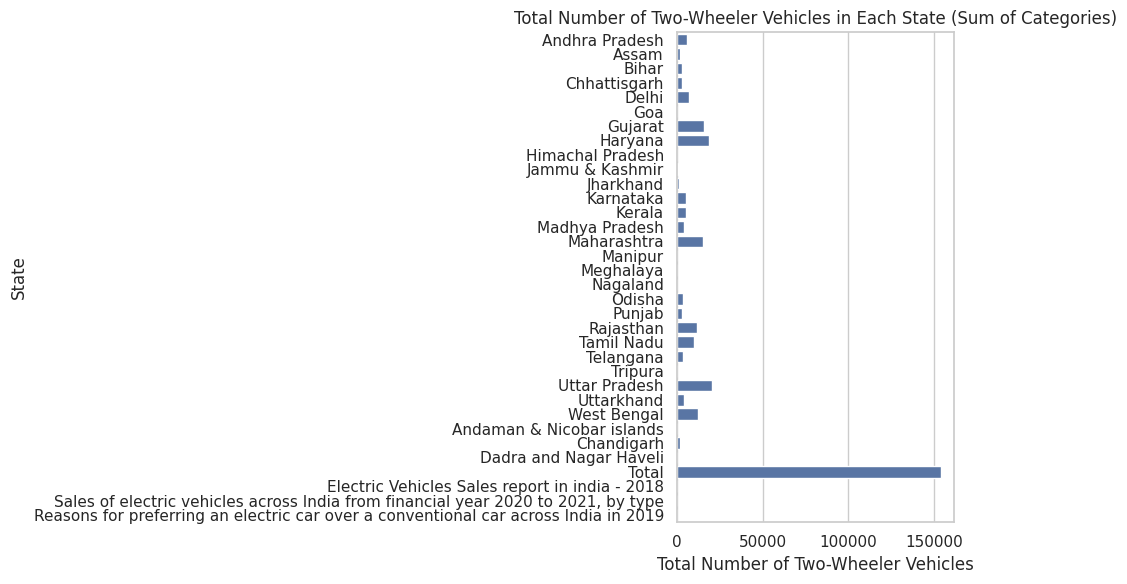

In [32]:
# Analysis of 2 Wheeler EVs


df2['Total Two Wheelers'] = df2[['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
                               'Two Wheelers (Category L2 (CMVR))',
                               'Two Wheelers (Max power not exceeding 250 Watts)']].sum(axis=1)

# Create a barplot using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Plot the total number of two-wheeler vehicles using sns.barplot
sns.barplot(x="Total Two Wheelers", y="State", data=df2, orient="h")

# Customize plot labels and appearance
plt.xlabel("Total Number of Two-Wheeler Vehicles")
plt.ylabel("State")
plt.title("Total Number of Two-Wheeler Vehicles in Each State (Sum of Categories)")

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-33-0af249bce30d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, y=df2['State'].sort_values(ascending=True), x='Buses', palette='viridis')


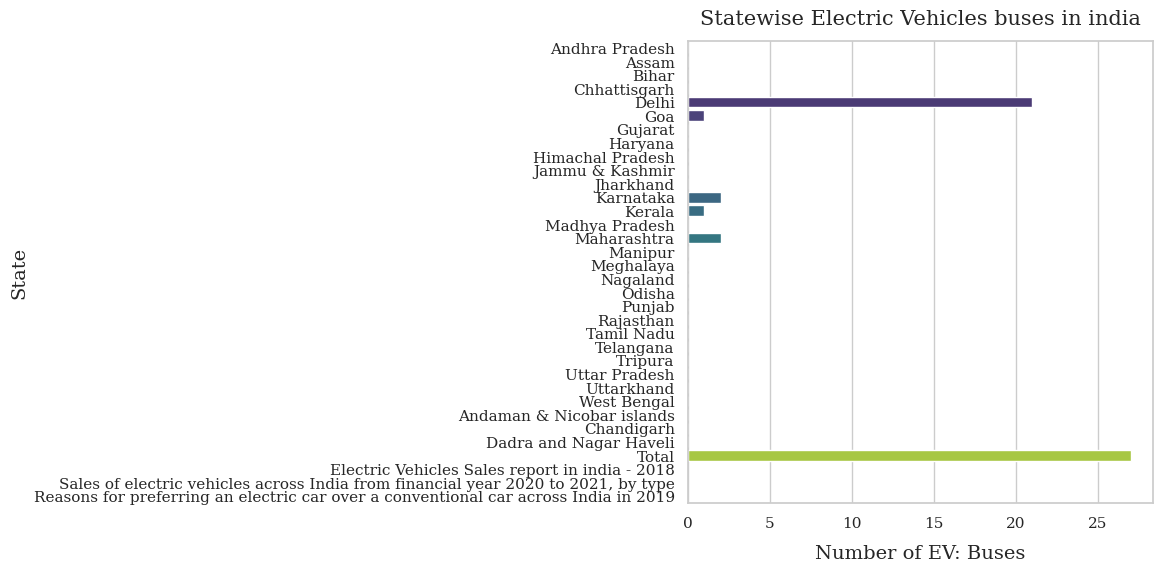

In [33]:
# Analysis of Buses
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, y=df2['State'].sort_values(ascending=True), x='Buses', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: Buses', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles buses in india', weight=200, family='serif', size=15, pad=12)
plt.show()

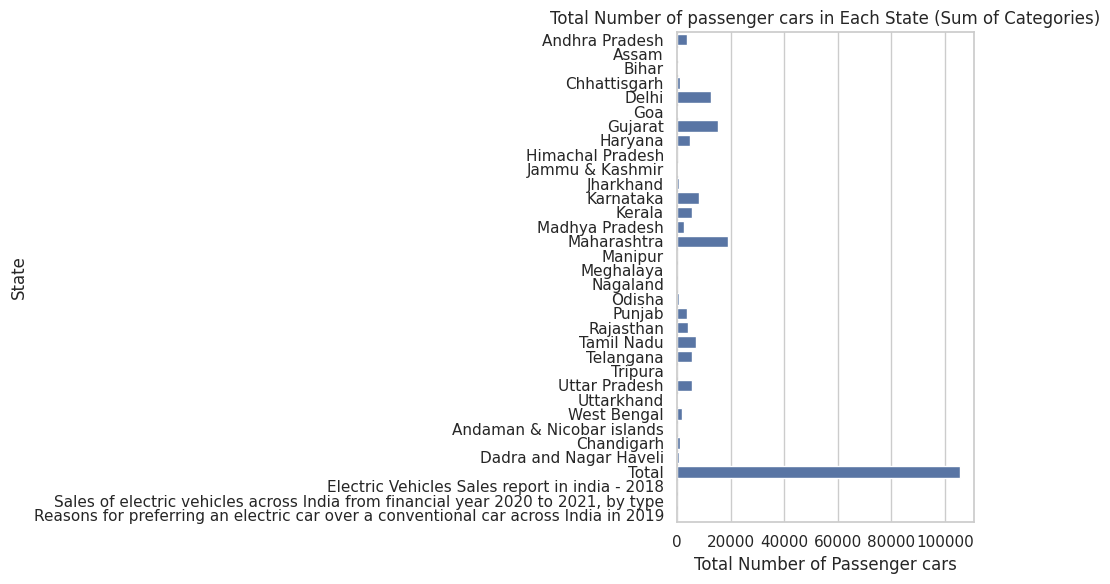

In [34]:
# Analysis of Passenger Cars
df2['Total Passenger cars'] = df2[['Passenger Cars (Category M1 as per CMVR)']].sum(axis=1)

# Create a barplot using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Plot the total number of two-wheeler vehicles using sns.barplot
sns.barplot(x="Total Passenger cars", y="State", data=df2, orient="h")

# Customize plot labels and appearance
plt.xlabel("Total Number of Passenger cars")
plt.ylabel("State")
plt.title("Total Number of passenger cars in Each State (Sum of Categories)")

# Show the plot
plt.tight_layout()
plt.show()